In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
with open('../results/2023-02-02_17-33-28_results.json') as f:
    data = json.load(f)

In [5]:
for d in data:
    results = d['results']
    configs = d['configs']
    
    r2 = results['total']['r2score_val']
    r2_train = results['total']['r2score_train']
    print(configs)
    print('train', '{0:.4}'.format(np.mean(r2_train)) + '\\pm {0:.3}'.format(np.std(r2_train)))
    print('val', '{0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}'.format(np.std(r2)))

{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
train 0.9321\pm 0.000844
val 0.9086\pm 0.00123
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.0019999996, 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
train 0.9576\pm 0.000696
val 0.8612\pm 0.0025


In [11]:
for d in data:
    print(d['model_id'])
    print(d['configs'])
    for i in range(1, 7):
        val_mapes = d['results']['by_response'][f'OBJ{i}']['mape_val']
        print(f'OBJ{i}', np.mean(val_mapes))

2023-02-02_16-06-47_w=100_d=5_activation=sigmoid_bs=1024_lr=0.001_dr=0.0
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.001, 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
OBJ1 0.009760350499999999
OBJ2 0.0182110108
OBJ3 0.016027959399999996
OBJ4 0.046861071600000005
OBJ5 0.039168881999999995
OBJ6 0.146934638
2023-02-02_16-06-47_w=100_d=5_activation=sigmoid_bs=1024_lr=0.002_dr=0.0
{'depth': 5, 'optimizer': 'ADAM', 'n_folds': 5, 'dropout_rate': 0.0, 'loss_function': 'mse', 'learning_rate': 0.0019999996, 'n_epochs': 2500, 'width': 100, 'activation_function': 'sigmoid', 'batchsize': 1024}
OBJ1 0.0118683781
OBJ2 0.0189867318
OBJ3 0.0225721496
OBJ4 0.05739059519999999
OBJ5 0.0453184982
OBJ6 0.16777770200000003


In [199]:
model_id = data[0]['model_id']
model_id

'2022-11-03_14:47:49_w=200_d=6_activation=sigmoid_bs=1024_lr=0.001_dr=0.0'

In [109]:
def getinfo(obj):
    infotoformat = {4: {}, 5: {}, 6: {}}
    for d in data:
        results = d['results']
        configs = d['configs']

        r2 = results['by_response'][obj]['r2score_val']

        infotoformat[
            configs['depth']
        ][configs['width']] = '${0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}$'.format(np.std(r2))
    
    return infotoformat

In [110]:
def formatinfo(vals, obj):
    print('''
        \\begin{table*}[htp!]
        \centering
         \\begin{tabular}{|c |c c c|} 
         \hline
         & Depth 4 & Depth 5 & Depth 6 \\\\
         \hline
         Width 50 & %s & %s & %s \\\\
         Width 75 & %s & %s & %s \\\\
         Width 100 & %s & %s & %s \\\\
         \hline
         \end{tabular}
         \caption{\label{tab:valr2}Aggregated validation set $R^2$ scores.}
        \end{table*}
    ''' % tuple(vals[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100]))

In [111]:
def maketable(obj):
    vals = getinfo(obj)
    formatinfo(vals, obj)

In [52]:
for i in [1, 2, 3, 4, 5, 6]:
    maketable(f'OBJ{i}')

KeyError: 50

In [53]:
def compute_color(depth, width, alpha=1.):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    #purple = (0.4, 0.1, 0.3)
    main = orange
    if width == 100:
        main = orange
    if width == 150:
        main = green
    if width == 200:
        main = blue
    return (*main, alpha*(.32*(depth-6)+0.85))

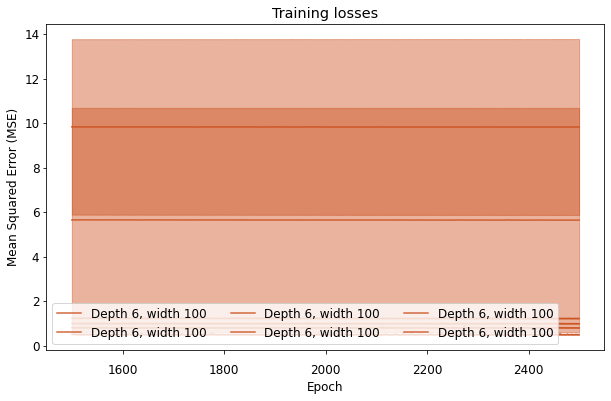

In [55]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))
epochs = list(range(1500, 2500))

plt.rc('font', **{'size': 12})

for d in data:
    depth = d['configs']['depth']
    width = d['configs']['width']
    losses = d['results']['total']['training_losses']
    means = np.mean(losses, axis=0)[-1000:]
    ax.plot(
        epochs, np.mean(d['results']['total']['training_losses'], axis=0)[-1000:],
        color=compute_color(depth, width),
        label=f'Depth {depth}, width {width}'
    )
    stds = np.std(losses, axis=0)[-1000:]
    ax.fill_between(epochs, means-stds, means+stds, color=compute_color(depth, width, alpha=0.5), edgecolor="none")
    
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
#plt.legend(bbox_to_anchor=(1.,0.5), ncol=3, loc='upper left')
plt.legend(ncol=3, loc='lower left')
ax.set_title('Training losses')
# plt.subplots_adjust(right=.2)
plt.savefig('training_losses.png', dpi=400)
plt.show()

In [155]:
paper_mapes = {
    'OBJ1': 0.017,
    'OBJ2': 0.018,
    'OBJ3': 0.013,
    'OBJ4': 0.048,
    'OBJ5': 0.117,
    'OBJ6': 0.115,
}

In [168]:
data[0]['model_id']

'2022-11-02_10:30:27_w=100_d=6_activation=sigmoid_bs=1024_lr=0.005_dr=0.0'

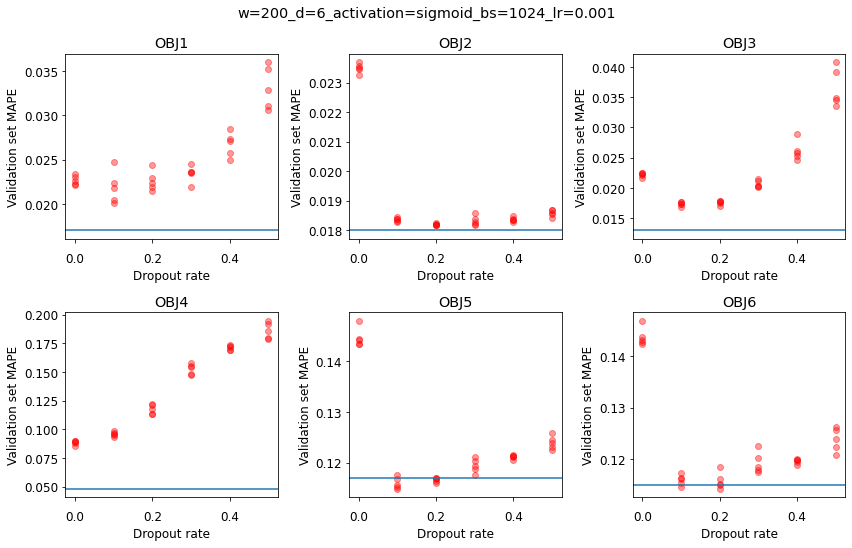

In [203]:
# mapes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(paper_mapes[f'OBJ{i}'], label='MAPE from paper')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate')
    ax.set_ylabel('Validation set MAPE')
#    ax.set_ylim(paper_mapes[f'OBJ{i}']*.8, paper_mapes[f'OBJ{i}']*1.25)

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate > 0.75:
        continue
    else:
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter([dropout_rate]*5, mape_val, color='r', alpha=0.4)
   
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.001')
plt.show()

In [202]:
for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    for i in range(1, 7):
        if i >= 5:
            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']
            print(f'OBJ {i}')
            print(mape_val)

OBJ 5
[0.14409484, 0.14445888, 0.14341891, 0.14796962, 0.14341933]
OBJ 6
[0.14315255, 0.14356211, 0.14231421, 0.14679277, 0.14272745]
OBJ 5
[0.1168363, 0.11758536, 0.11486592, 0.11560099, 0.11532588]
OBJ 6
[0.114692755, 0.11747133, 0.116372004, 0.1154805, 0.116144925]
OBJ 5
[0.117033295, 0.11634862, 0.11603434, 0.11693141, 0.11672435]
OBJ 6
[0.118466444, 0.11506183, 0.11615885, 0.115232825, 0.114319555]
OBJ 5
[0.12039041, 0.117574506, 0.11942791, 0.1211948, 0.1188174]
OBJ 6
[0.11756824, 0.118583106, 0.11787668, 0.12253311, 0.12032304]
OBJ 5
[0.12051837, 0.1212666, 0.121307336, 0.12115495, 0.1214434]
OBJ 6
[0.11893612, 0.12017995, 0.11986144, 0.119538166, 0.11981685]
OBJ 5
[0.12589967, 0.124431714, 0.12389454, 0.12249284, 0.123171665]
OBJ 6
[0.12393517, 0.12082295, 0.12234803, 0.12572694, 0.12617598]


In [173]:
for d in data:
    print(d['results']['by_response']['OBJ5']['mape_val'])

[0.12617181, 0.12886064, 0.12890603, 0.12773697, 0.12662774]
[0.12224516, 0.120170705, 0.12102177, 0.12165374, 0.119857214]
[0.12530094, 0.12066077, 0.11682191, 0.11959501, 0.12408902]
[0.12568495, 0.1241727, 0.12781265, 0.12380472, 0.122926615]
[0.13299948, 0.124080636, 0.1290278, 0.3460866, 0.13005708]
[0.34025598, 0.13648492, 0.135988, 0.34902093, 0.3403678]


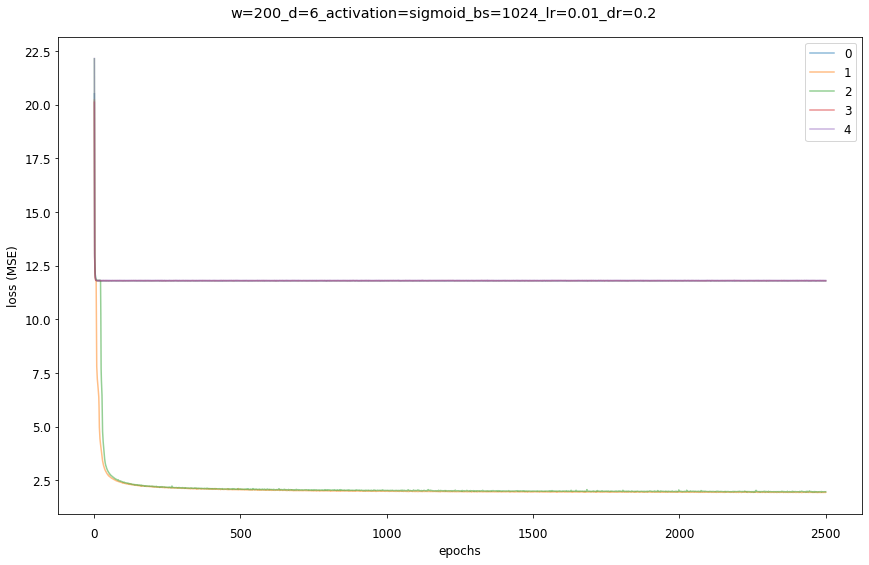

In [177]:
# mapes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate == 0.5:
        training_losses = results['total']['training_losses']

        for fold_id in range(5):
            ax.plot(np.arange(1, 2501), training_losses[fold_id], alpha=0.5, label=fold_id)

plt.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.01_dr=0.2')
ax.set_xlabel('epochs')
ax.set_ylabel('loss (MSE)')
#ax.set_ylim(11.6, 12.)
plt.show()